In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import set_config
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
import seaborn as sns
sns.set()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("tra.csv")

In [4]:
df.head()

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         5407 non-null   int64  
 1   CementComponent            5407 non-null   float64
 2   BlastFurnaceSlag           5407 non-null   float64
 3   FlyAshComponent            5407 non-null   float64
 4   WaterComponent             5407 non-null   float64
 5   SuperplasticizerComponent  5407 non-null   float64
 6   CoarseAggregateComponent   5407 non-null   float64
 7   FineAggregateComponent     5407 non-null   float64
 8   AgeInDays                  5407 non-null   int64  
 9   Strength                   5407 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 422.5 KB


In [6]:
df.describe()

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000
mean,2703.000000,299.168189,58.610579,31.872795,185.076235,4.108441,992.000718,771.219974,51.751618,35.452071
std,1561.010784,105.537682,83.417801,54.605003,18.517583,5.692296,77.148010,78.725253,70.006975,16.401896
min,0.000000,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,1351.500000,213.700000,0.000000,0.000000,175.100000,0.000000,938.200000,734.300000,7.000000,23.640000
50%,2703.000000,297.200000,0.000000,0.000000,187.400000,0.000000,978.000000,781.200000,28.000000,33.950000
75%,4054.500000,375.000000,122.600000,79.000000,192.000000,8.050000,1047.000000,821.000000,56.000000,45.850000
max,5406.000000,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
df.drop(labels="id", axis=1, inplace=True)

In [8]:
def detect_outliers(df, features, thold):
    outlier_indices = []
    
    for fe in features:
        # 1st quartile or 25%
        q1 = np.percentile(df[fe], 25)
        # 3rd quartile or 75%
        q3 = np.percentile(df[fe], 75)
        # IQR formula
        IQR = q3 - q1
        # Outlier step
        outlier_step = IQR * thold
        # Detect outlier and their indices
        outlier_list = df[(df[fe] < q1 - outlier_step) | (df[fe] > q3 + outlier_step)].index
        # store indices
        outlier_indices.extend(outlier_list)
    
    return outlier_indices

In [9]:
features = ['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
           'WaterComponent', 'SuperplasticizerComponent',
           'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays']
outliers = detect_outliers(df, features, 1.5)
df = df.drop(df.loc[outliers].index, axis=0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534 entries, 0 to 5406
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            4534 non-null   float64
 1   BlastFurnaceSlag           4534 non-null   float64
 2   FlyAshComponent            4534 non-null   float64
 3   WaterComponent             4534 non-null   float64
 4   SuperplasticizerComponent  4534 non-null   float64
 5   CoarseAggregateComponent   4534 non-null   float64
 6   FineAggregateComponent     4534 non-null   float64
 7   AgeInDays                  4534 non-null   int64  
 8   Strength                   4534 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 354.2 KB


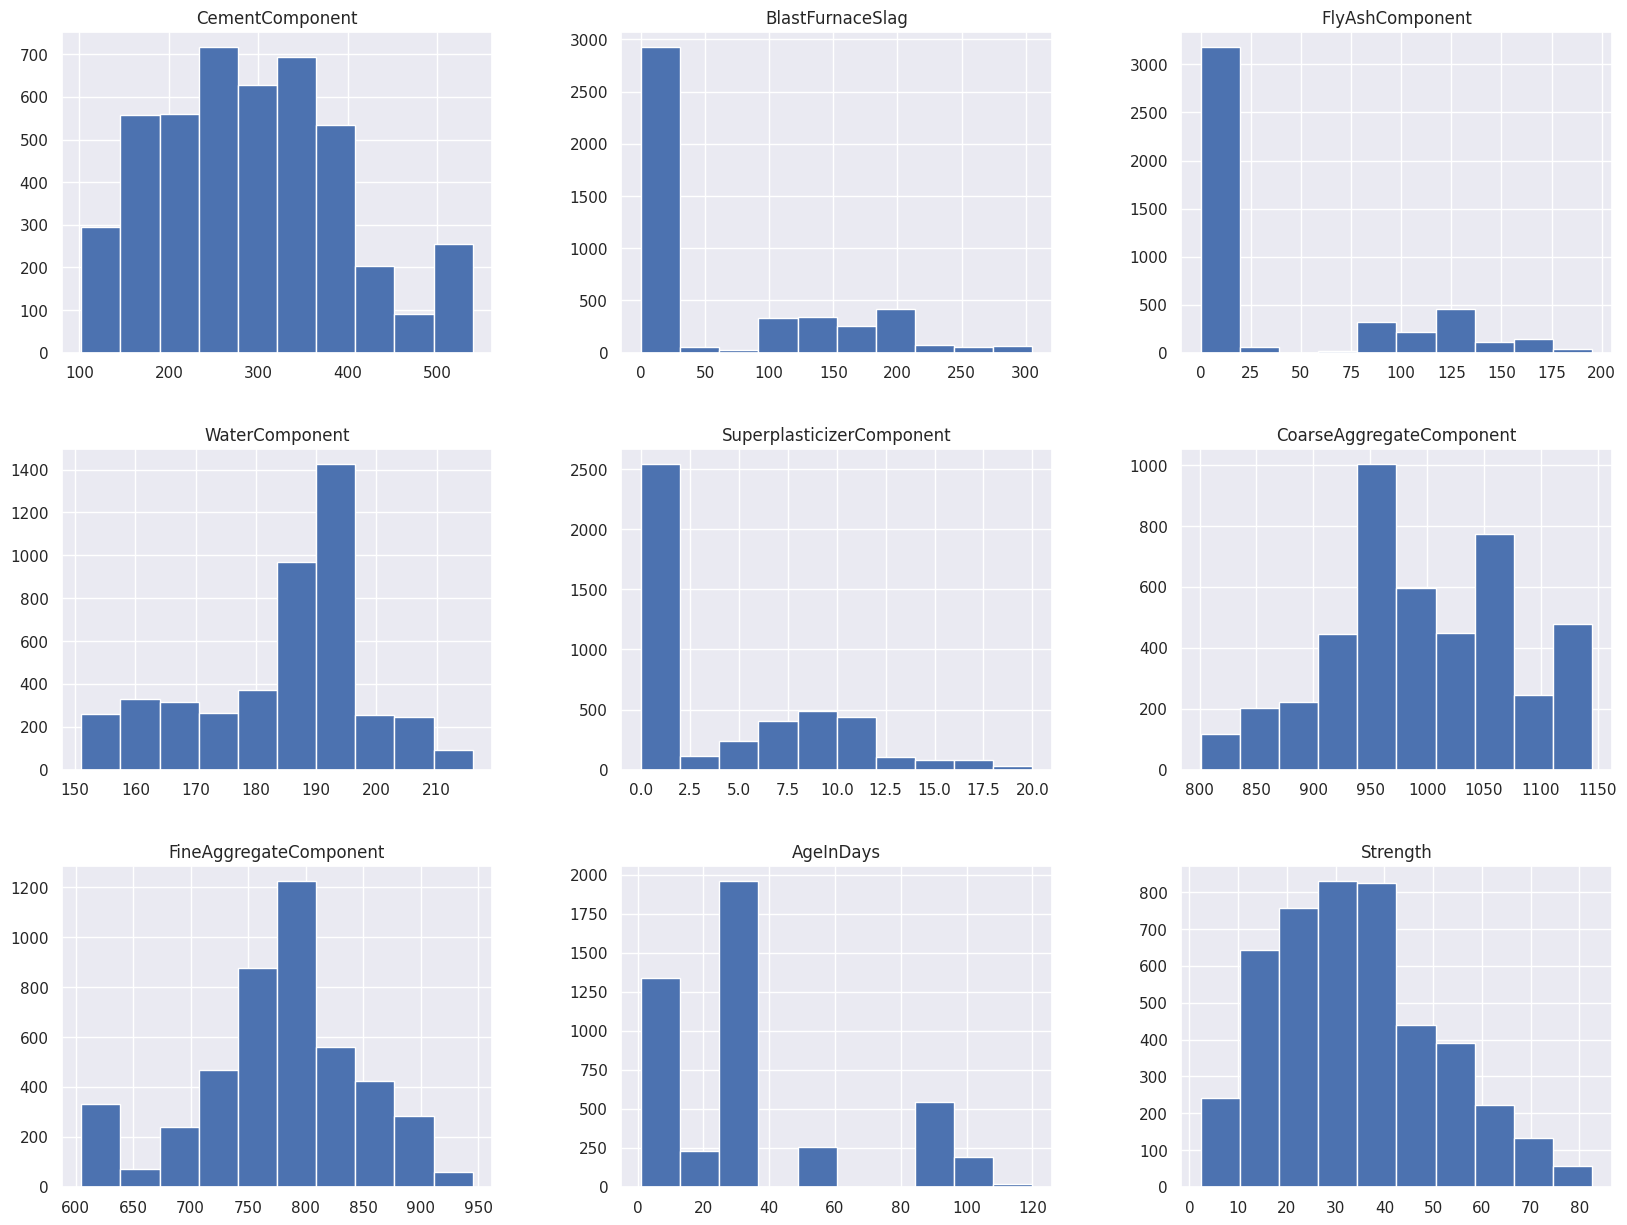

In [11]:
df.hist(figsize=(20,15))
plt.show()

In [12]:
corr_matrix = df.corr()

In [13]:
corr_matrix["Strength"].sort_values(ascending=False)

Strength                     1.000000
AgeInDays                    0.501332
SuperplasticizerComponent    0.236062
CementComponent              0.114503
BlastFurnaceSlag             0.084956
FlyAshComponent              0.066403
FineAggregateComponent      -0.066202
CoarseAggregateComponent    -0.100830
WaterComponent              -0.172585
Name: Strength, dtype: float64

In [14]:
attr = ["Strength", "AgeInDays", "SuperplasticizerComponent", "WaterComponent"]

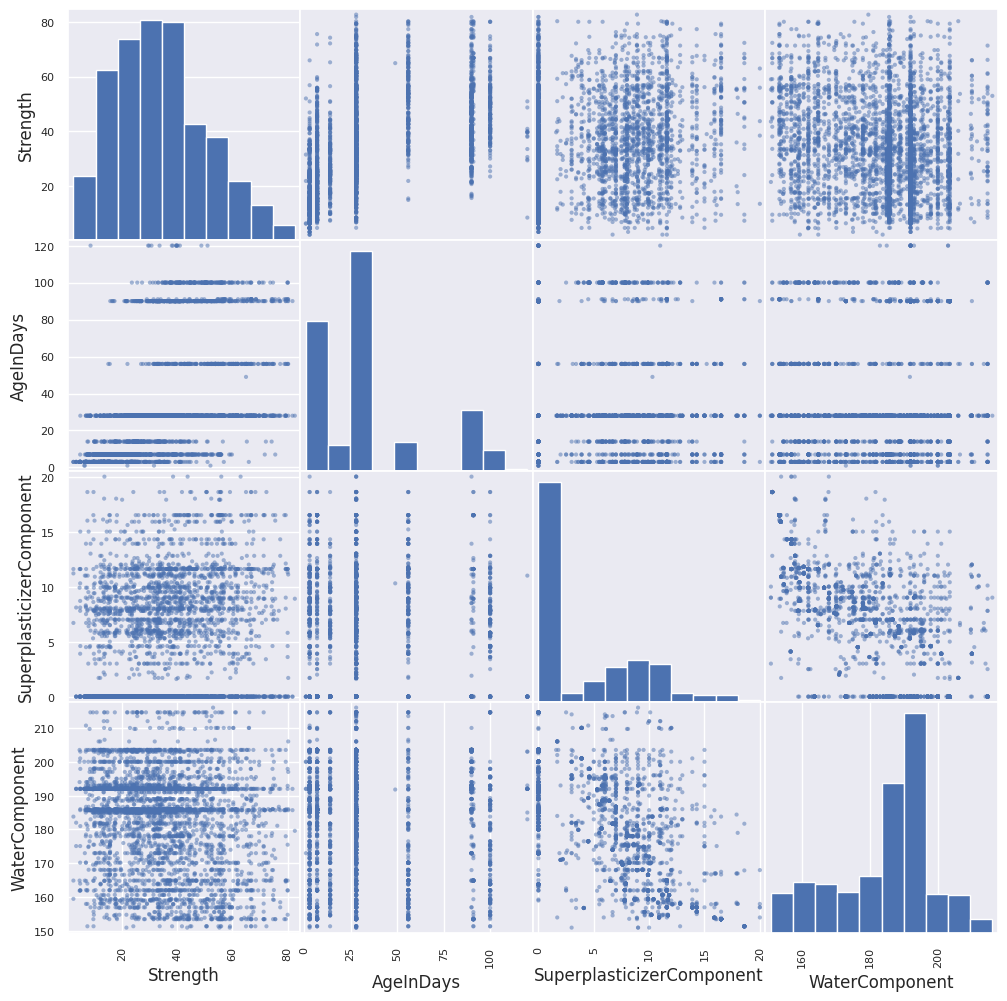

In [15]:
scatter_matrix(df[attr], figsize=(12,12))
plt.show()

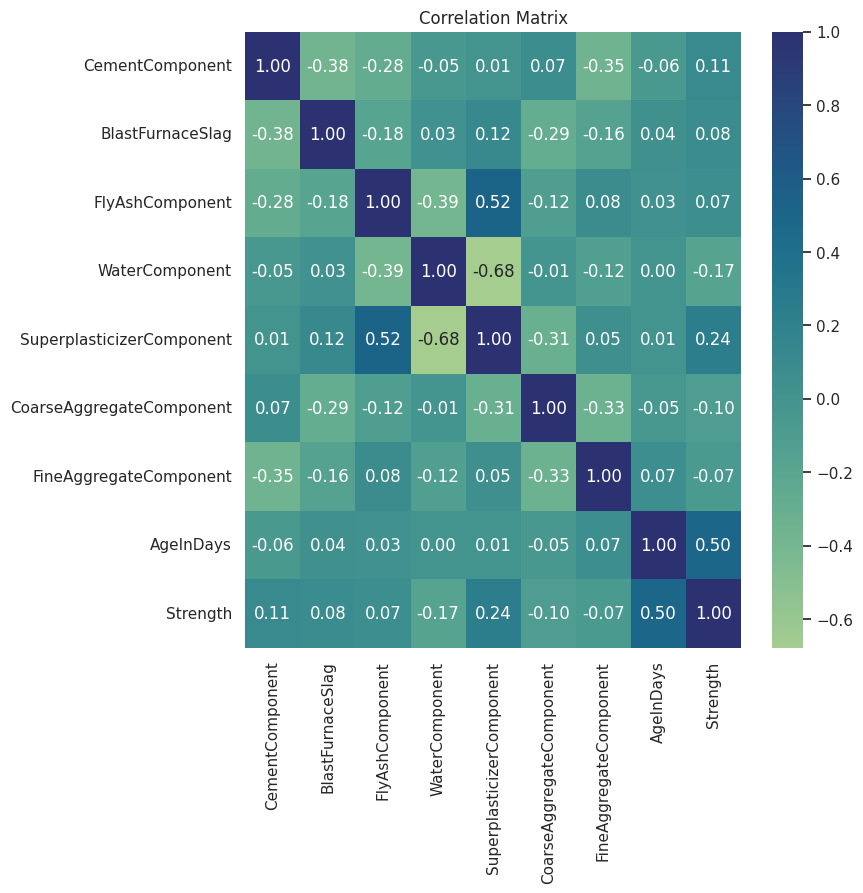

In [16]:
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, cbar=True, fmt=".2f", cmap="crest")
plt.title("Correlation Matrix")
plt.show()

In [17]:
X_train, X_test, y_train , y_test = train_test_split(df.drop("Strength", axis=1), df["Strength"],
                                     test_size=0.2, random_state=42)

In [18]:
scaler = StandardScaler()

In [19]:
X_train_scaled = scaler.fit_transform(X_train)

In [20]:
X_train_scaled

array([[-0.74202459, -0.0579319 ,  1.57856076, ...,  0.25028212,
         0.05219873, -0.63957484],
       [ 1.25981406, -0.43927093,  1.75993093, ..., -2.24541521,
        -0.37918384,  0.76228119],
       [ 0.59923603, -0.493234  ,  1.07754809, ..., -0.36358415,
         1.32660998,  1.89711702],
       ...,
       [ 0.86250988, -0.70309038, -0.61045157, ...,  0.68504998,
        -0.53002677, -0.1722895 ],
       [-0.30068188,  0.62799868,  0.93388854, ..., -2.10784687,
         0.19035393, -0.1722895 ],
       [ 0.85772308, -0.70309038, -0.61045157, ...,  1.50526876,
         0.10013012, -0.1722895 ]])

In [21]:
# function to show scores
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [22]:
forest = RandomForestRegressor()
forest.fit(X_train_scaled, y_train)
forest_scores = cross_val_score(forest, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=10)
display_scores(np.sqrt(-forest_scores))

Scores:  [12.586183   13.20371393 13.04655043 12.39192152 12.68308383 13.11366653
 13.95440496 12.23951917 13.31626121 12.23535932]
Mean:  12.87706639025572
Standard deviation:  0.5216144080055136


In [23]:
svr = SVR()
svr.fit(X_train_scaled, y_train)
svr_scores = cross_val_score(svr, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=10)
display_scores(np.sqrt(-svr_scores))

Scores:  [11.86571656 13.37963677 12.4204805  12.5854888  12.07350386 13.33863422
 13.00760172 12.3513296  13.06124342 12.4587158 ]
Mean:  12.654235126184771
Standard deviation:  0.49330421943810154


In [24]:
param_grid = [
    {"n_estimators": [10, 30, 60, 80], "max_features": [8, 12, 20]},
    {"bootstrap": [False], "n_estimators": [10, 30, 50], "max_features": [8, 12]}
]

In [25]:
grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error',
                          return_train_score=True)

In [27]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 80}

In [28]:
model = grid_search.best_estimator_

In [29]:
pipeline = Pipeline([
    ("std_scaler", scaler),
    ("model", model)
])

In [31]:
y_pred = pipeline.predict(X_test)

In [32]:
mse = mean_squared_error(y_test, y_pred)
np.sqrt(mse)

13.034989070282597

In [33]:
test_df = pd.read_csv("test.csv")
test_df_x = test_df.drop(labels="id", axis=1)

In [34]:
final_pred = pipeline.predict(test_df_x)
df = pd.DataFrame({'id': test_df['id'], 'Strength':final_pred})
df.to_csv('submission.csv',index= False)

In [35]:
sub = pd.read_csv("sub.csv")
sub.head()

,id,Strength
0,5407,50.023040
1,5408,20.949425
2,5409,32.959577
3,5410,46.808637
4,5411,36.353375
